# Churn Baby Churn

Code source: [DataCamp](https://www.datacamp.com/community/tutorials/predicting-employee-churn-python)

## Defining Churn

Ex. *Churn: when a member of a population leaves a population*

Q. Are there any attributes about your population that offer unique considerations?

## Load Dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data_Churn_HR.csv")

## Exploratory Data Analyses

### Test **Attribute Details**

Column 'Departments ' has a space that needs to be removed.

In [3]:
for column in data.columns:
    data.rename(columns = {column: column.strip()}, inplace = True)

Extract descriptive statistics for each attribute.

In [22]:
# I designed a function column_details() for doing this

data_col_deets = column_details(data)
data_col_deets

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
Index,,,,,,,,,,
Type,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'str'>,<class 'str'>
Count,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
Missing,0,0,0,0,0,0,0,0,0,0
Num_Uniq,92,65,6,215,8,2,2,2,10,3
Min,0.09,0.36,2,96,2,0,0,0,string,string
Max,1,1,7,310,10,1,1,1,string,string
Mean,0.612834,0.716102,3.80305,201.05,3.49823,0.14461,0.238083,0.0212681,string,string
Std,0.248622,0.171163,1.23255,49.9414,1.46009,0.351707,0.42591,0.144277,string,string
Levels,too many,too many,"[2, 3, 4, 5, 6, 7]",too many,"[2, 3, 4, 5, 6, 7, 8, 10]","[0, 1]","[0, 1]","[0, 1]","[IT, RandD, accounting, hr, management, market...","[high, low, medium]"


### Attribute **Left**

The 'supervised' variable is 'left'. 0 - False and 1 - True

In [8]:
data_col_deets['left']

Index
Type        <class 'numpy.int64'>
Count                       14999
Missing                         0
Num_Uniq                        2
Min                             0
Max                             1
Mean                     0.238083
Std                       0.42591
Levels                     [0, 1]
Name: left, dtype: object

We can look at the mean values of other attributes based on grouping by 'left'

In [9]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left:
* Had low satisfaction levels
* Did not receive a promotion in the last 5 years

### Test **How many employees left**

Roughly 3500 employees have left the company.

In [10]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Test **Categorical Attribute Distributions**

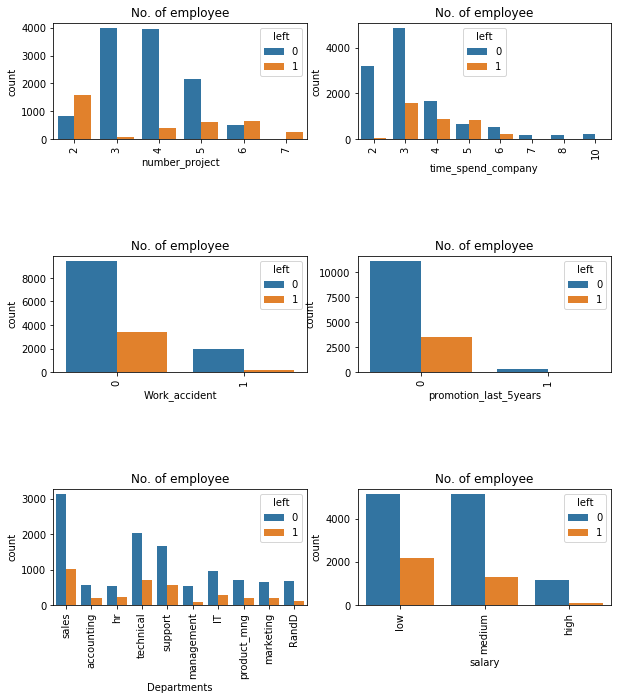

In [20]:
features=['number_project','time_spend_company','Work_accident','promotion_last_5years','Departments','salary']

fig = plt.subplots(figsize=(10,15))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Employees with projects ranging from 3 to 5, are likely to have stayed, while more or less are likely to have left.

Highest rates of 'left' are seen at 3-5 years.

None of the employees that left were given promotions in the last 5 years.

Few of the highly paid employees have left.

### Test **Clustering Left Employees by Satisfaction and Evaluation**

Two important features would be the 'satisfaction level' of the employee and the 'last_evaluation' by the company.

In [18]:
#import module
from sklearn.cluster import KMeans

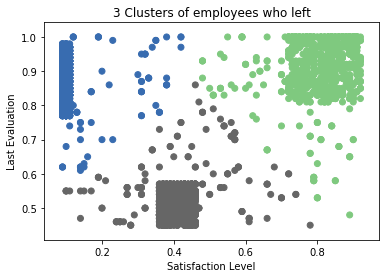

In [19]:
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Three groups are present:
* High evaluation, low satisfaction == 'Frustrated'
* Low evaluation, medium satisfaction == 'Bad match'
* High evaluation, high satisfaction == 'Winners'

## Data Transformations

### Label encode categorical variables.

In [21]:
from sklearn import preprocessing

In [23]:
# create instance of labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
data['salary'] = le.fit_transform(data['salary'])
data['Departments'] = le.fit_transform(data['Departments'])

### Split train and test set

Seventy percent of the data will be used for training the model and 30% will be used for model testing.

In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [25]:
# Features
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments', 'salary']]

# Target attribute
y=data['left']

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

## Model Building

In [29]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [30]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

## Model Performance

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


The model was able to classified employees who left at a rate of 97%.

When the model predicted an employee was going to leave, they left 95% of the time.

If an employee left, the model identified it 92% of the time.

## **Dependencies**

In [5]:
# v001

def column_details(data):
    
    column_details = extract_column_details(data)
    
    import pandas as pd
        
    column_details['Index'] = ['Type','Count','Missing','Num_Uniq','Min','Max','Mean','Std','Levels']
    
    df = pd.DataFrame(column_details, columns = column_details.keys()).set_index('Index', drop = True)
    
    return df    

In [6]:
# v001

def extract_column_details(data, column_details = {}):
    """
    Return details about each column in a dataframe
    """
    
    import numpy as np
    from pandas import DataFrame
    
    for column in data.columns:
        col_type = type(data[column][0])
        col_count = len(data[column])
        col_miss = data[column].isnull().sum()  # how many missing values?
        col_num_unique = len(np.unique(data[column]))  # how many unique values?

        if (type(data[column][0]) is str) == False:  # only if float or integer
            col_min = np.min(data[column])  # minimum
            col_max = np.max(data[column])  # maximum
            col_mean = np.mean(data[column])  # average
            col_std = np.std(data[column])  # standard deviation

        else:  # if its a string
            col_min = 'string'  # minimum
            col_max = 'string'  # maximum
            col_mean = 'string'  # average
            col_std = 'string'  # standard deviation

        if col_num_unique <= 10:  # want to list unique values
            col_list = np.unique(data[column])

        else:
            col_list = "too many"

        # create a dictionary to store the info
        column_details[column] = [col_type,
                                  col_count,
                                  col_miss,
                                  col_num_unique,
                                  col_min,
                                  col_max,
                                  col_mean,
                                  col_std,
                                  col_list]
        
    return column_details